## Students Performance in Exams
### 사용 데이터
- [Students Performance in Exams](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams)
- Data Description
  - gender
  - race/ethnicity
  - parental level of education
  - lunch
  - test preparation course
  - math score
  - reading score
  - writing score

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

raw_data = pd.read_csv("./StudentsPerformance.csv")
data = raw_data.copy()
print(data.shape)

(1000, 8)


In [2]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [3]:
data.duplicated().sum()

0

In [4]:
# data.sample(10)
data.sample(frac=0.01)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
525,male,group E,some college,standard,none,68,60,59
494,female,group B,high school,standard,none,54,64,68
977,male,group C,associate's degree,standard,none,62,65,58
995,female,group E,master's degree,standard,completed,88,99,95
917,female,group C,high school,standard,none,44,61,52
305,male,group A,some college,standard,none,69,67,69
721,male,group D,some high school,free/reduced,completed,55,59,59
289,male,group E,some high school,standard,completed,77,76,77
913,female,group C,bachelor's degree,free/reduced,completed,47,62,66
440,female,group C,some college,standard,completed,67,81,79


In [5]:
# data.columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
for i in range(data.shape[1]):
  print(f'{data.columns[i]}: {data.loc[:,data.columns[i]].unique()}')

gender: ['female' 'male']
race/ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch: ['standard' 'free/reduced']
test preparation course: ['none' 'completed']
math score: [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
reading score: [ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96  24  29  40]
writing score: [ 74  88  93  44  75 

### 과목별 비교

<AxesSubplot:>

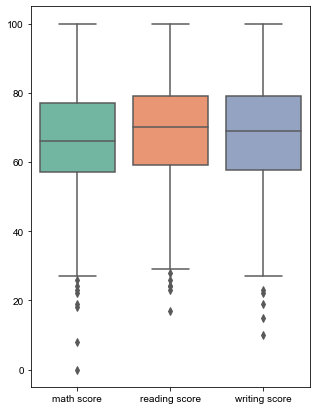

In [7]:
fig, ax = plt.subplots(figsize = (5,7))
sns.set_theme(style="whitegrid")
sns.boxplot(data=data, orient="y", palette="Set2")

In [8]:
q3 = data.quantile(0.75)
q1 = data.quantile(0.25)

iqr = q3 - q1
iqr

math score       20.00
reading score    20.00
writing score    21.25
dtype: float64

In [9]:
def is_outlier(column_name):
  iqr_range = 1.5
  outlier_detection = lambda x: True if x > q3[column_name] + iqr_range*iqr[column_name] or \
    x < q1[column_name] - iqr_range*iqr[column_name] else False
  return data[column_name].apply(outlier_detection)

math_check = is_outlier('math score')
reading_check = is_outlier('reading score')
writing_check = is_outlier('writing score')


In [10]:
total_check = np.concatenate([[math_check], [reading_check], [writing_check]], axis=0)
total_check = total_check.T
total_check.shape

(1000, 3)

In [11]:
# 아웃라이어 데이터 체크
data.loc[map(lambda x : True if x.any() else False, total_check)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
17,female,group B,some high school,free/reduced,none,18,32,28
59,female,group C,some high school,free/reduced,none,0,17,10
76,male,group E,some high school,standard,none,30,26,22
145,female,group C,some college,free/reduced,none,22,39,33
211,male,group C,some college,free/reduced,none,35,28,27
327,male,group A,some college,free/reduced,none,28,23,19
338,female,group B,some high school,free/reduced,none,24,38,27
466,female,group D,associate's degree,free/reduced,none,26,31,38
596,male,group B,high school,free/reduced,none,30,24,15
787,female,group B,some college,standard,none,19,38,32


In [12]:
data_trim = data.loc[map(lambda x : True if not x.any() else False, total_check)]
data_trim.reset_index(drop=True, inplace=True)
data_trim

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
983,female,group E,master's degree,standard,completed,88,99,95
984,male,group C,high school,free/reduced,none,62,55,55
985,female,group C,high school,free/reduced,completed,59,71,65
986,female,group D,some college,standard,completed,68,78,77


In [13]:
data_trim.describe()

,math score,reading score,writing score
count,988.000000,988.000000,988.000000
mean,66.625506,69.640688,68.566802
std,14.409394,14.016760,14.525267
min,27.000000,29.000000,27.000000
25%,57.000000,60.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,80.000000,79.000000
max,100.000000,100.000000,100.000000


In [14]:
subject_name = data_trim.columns[-3:]
subject_name

Index(['math score', 'reading score', 'writing score'], dtype='object')

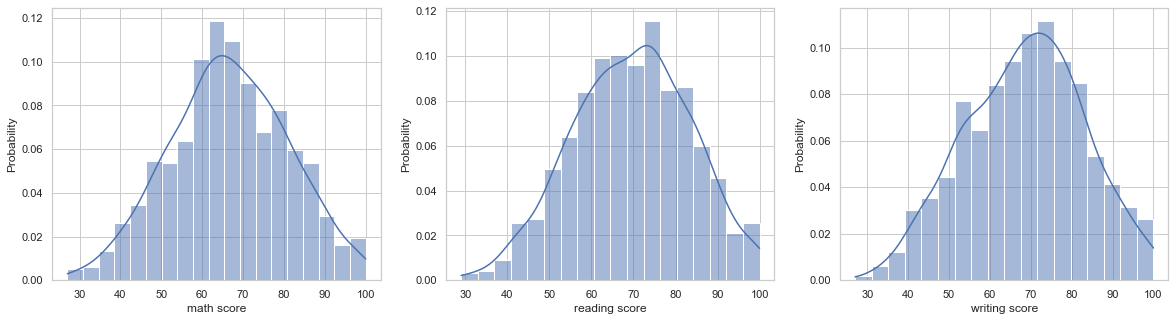

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
for i in range(len(subject_name)):
  sns.histplot(data=data_trim, x=subject_name[i], stat = "probability", kde=True, ax=ax[i])

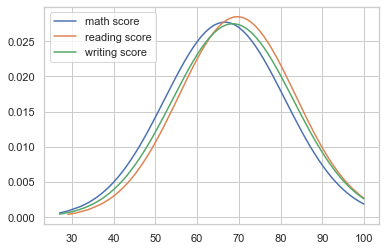

In [16]:
from scipy import stats
subject_name = data_trim.columns[-3:]

for i in range(len(subject_name)):
  sub = subject_name[i]
  data_trim_mean = np.mean(data_trim[sub])  
  data_trim_std = np.std(data_trim[sub])  
  cv1_pdf = stats.norm.pdf(data_trim[sub].sort_values(), loc=data_trim_mean, scale=data_trim_std)
  plt.plot(data_trim[sub].sort_values(), cv1_pdf, label=sub)
  plt.legend()

In [17]:
stats.levene(data_trim['reading score'], data_trim['writing score'])

LeveneResult(statistic=1.0546845877222482, pvalue=0.3045564692359549)

In [18]:
stats.ttest_rel(data_trim['reading score'], data_trim['writing score'])

Ttest_relResult(statistic=7.480374154343835, pvalue=1.6357011784200183e-13)

paired t-test를 해보았을 때, 읽기 점수와 쓰기 점수 간에 차이가 있다고 한다.  
그래프를 보았을 때는 없어보인다. 정규성 검정을 하지 않아서 생기는 문제일 수도 있다.

In [19]:
# 0.05 보다 작으면 정규성 만족 X
print('reading \n statistic: {result[0]} \n p-value {result[1]}'.format(result = stats.shapiro(data_trim['reading score'])))
print('writing \n statistic: {result[0]} \n p-value {result[1]}'.format(result = stats.shapiro(data_trim['writing score'])))

reading 
 statistic: 0.9943972229957581 
 p-value 0.0009765107533894479
writing 
 statistic: 0.9930988550186157 
 p-value 0.00015123761841095984


In [20]:
# 정규성 가정을 만족하지 않으므로 Mann–Whitney U test로 재분석한다.
stats.mannwhitneyu(data_trim['reading score'], data_trim['writing score'])

MannwhitneyuResult(statistic=507293.0, pvalue=0.12952348679091782)

읽기 점수와 쓰기 점수 간 유의미한 차이는 관찰되지 않는다.   
이번에는 점수들 간의 상관관계를 살펴보자.

<AxesSubplot:xlabel='reading score', ylabel='writing score'>

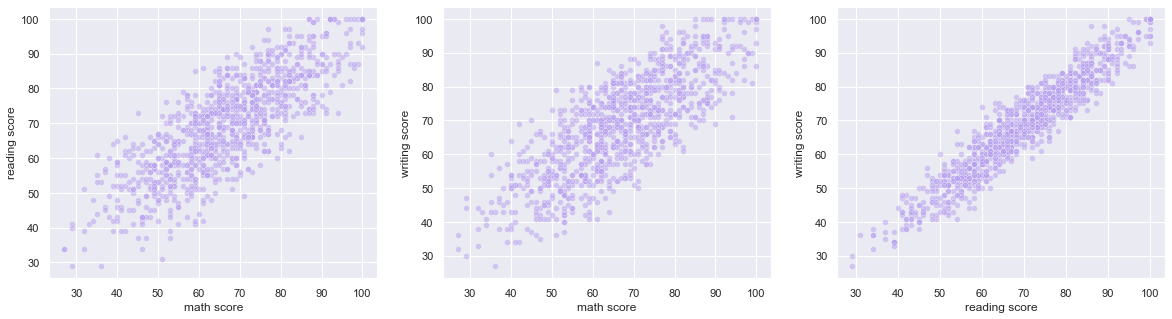

In [21]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.scatterplot(data=data_trim, x='math score', y='reading score', color='#B69FEE', alpha=0.5, ax=ax[0])
sns.scatterplot(data=data_trim, x='math score', y='writing score', color='#B69FEE', alpha=0.5, ax=ax[1])
sns.scatterplot(data=data_trim, x='reading score', y='writing score', color='#B69FEE', alpha=0.5, ax=ax[2])

In [22]:
data_trim.corr(method='pearson')

,math score,reading score,writing score
math score,1.000000,0.801405,0.783349
reading score,0.801405,1.000000,0.950629
writing score,0.783349,0.950629,1.000000


세 과목 간의 상관이 높다.   
하나를 잘하면 다른 과목도 잘하는 경향이 있는 것으로 보인다.   
이와 관련하여 부모 학력이 미치는 영향을 추후 알아보고자 한다.

In [23]:
# levene test
print('math-reading \n statistic: {result[0]} \n p-value {result[1]}'.format(result = stats.levene(data_trim['math score'], data_trim['reading score'])))
print('math-writing \n statistic: {result[0]} \n p-value {result[1]}'.format(result = stats.levene(data_trim['math score'], data_trim['writing score'])))

math-reading 
 statistic: 0.3186777263345346 
 p-value 0.5724675059839113
math-writing 
 statistic: 0.20258250633372804 
 p-value 0.6526937696261298


In [24]:
# math score - shapiro-wilk test
print('math \n statistic: {result[0]} \n p-value {result[1]}'.format(result = stats.shapiro(data_trim['math score'])))

math 
 statistic: 0.9960000514984131 
 p-value 0.011811562813818455


In [25]:
# Mann–Whitney U test
print('math-reading \n statistic: {result[0]} \n p-value {result[1]}'.format(result = stats.mannwhitneyu(data_trim['math score'], data_trim['reading score'], alternative='less')))
print('math-writing \n statistic: {result[0]} \n p-value {result[1]}'.format(result = stats.mannwhitneyu(data_trim['math score'], data_trim['writing score'], alternative='less')))

math-reading 
 statistic: 429692.0 
 p-value 2.0667982392432928e-06
math-writing 
 statistic: 449346.5 
 p-value 0.0011278084602097279


그래도 수학 과목을 다른 두 과목보다 어려워하는 경향이 있는 것 같다.   
일반적으로 수학/읽기는 성별에 따라 달라질 수 있다고 하므로 성별에 따른 추가분석도 해보고자 한다.

---

### 부모 학력과의 관계

In [26]:
var_of_interest = 'parental level of education'
education_level = data[var_of_interest].unique()
data[var_of_interest].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [27]:
q3 = data.groupby([var_of_interest]).quantile(0.75)
q1 = data.groupby([var_of_interest]).quantile(0.25)

iqr = q3 - q1
iqr

,math score,reading score,writing score
parental level of education,,,
associate's degree,23.00,20.00,22.0
bachelor's degree,18.00,19.75,20.5
high school,18.25,20.25,21.0
master's degree,25.50,19.00,18.0
some college,17.00,19.75,19.0
some high school,21.00,22.50,23.0


In [28]:
data_trim2 = data.copy()

def is_outlier(education_level):
  iqr_range = 1.5

  for i in range(len(subject_name)):
    column_name = subject_name[i]
    outlier_detection = lambda x: True if x > q3[column_name][education_level] + iqr_range*iqr[column_name][education_level] or \
      x < q1[column_name][education_level] - iqr_range*iqr[column_name][education_level] else False

    outlier_check = data[column_name].apply(outlier_detection)
    data_trim2.drop(data_trim2[outlier_check].index, axis = 0, inplace=True)

  return data_trim2

for i in range(len(education_level)):
  is_outlier(education_level[i])

data_trim2.shape

(957, 8)

<AxesSubplot:xlabel='parental level of education', ylabel='math score'>

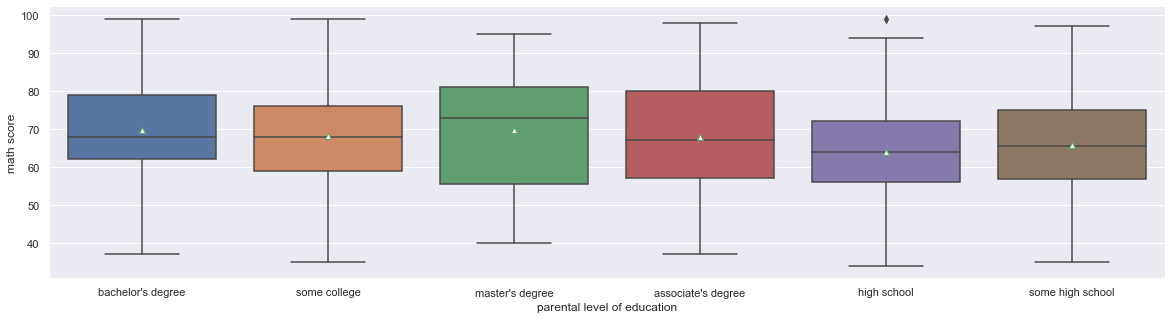

In [29]:
fig, ax = plt.subplots(figsize = (20,5))
sns.boxplot(x=var_of_interest, y="math score", data=data_trim2, showmeans=True, meanprops={"markerfacecolor":"white"})

<AxesSubplot:xlabel='parental level of education', ylabel='reading score'>

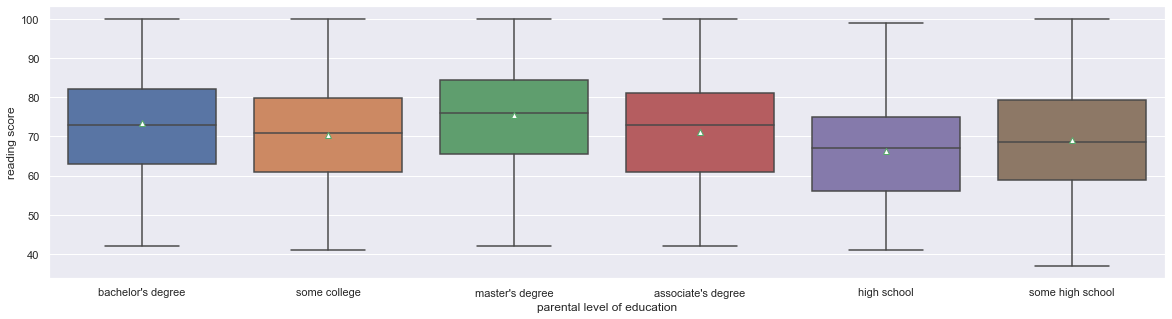

In [30]:
fig, ax = plt.subplots(figsize = (20,5))
sns.boxplot(x=var_of_interest, y="reading score", data=data_trim2, showmeans=True, meanprops={"markerfacecolor":"white"})

<AxesSubplot:xlabel='parental level of education', ylabel='writing score'>

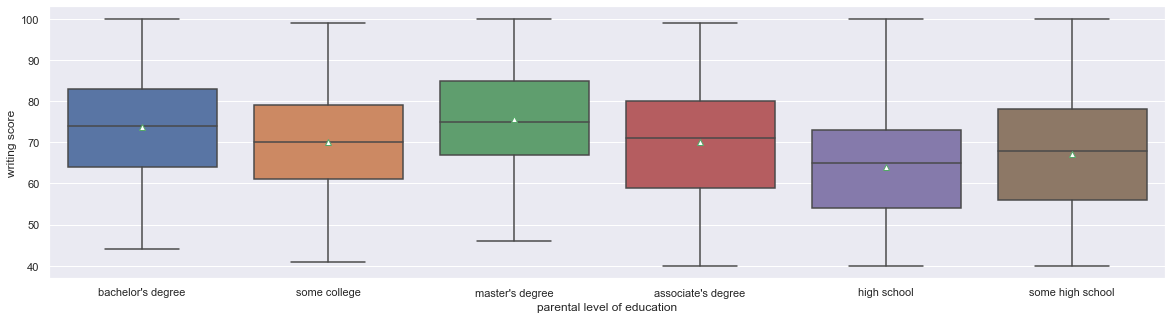

In [31]:
fig, ax = plt.subplots(figsize = (20,5))
sns.boxplot(x=var_of_interest, y="writing score", data=data_trim2, showmeans=True, meanprops={"markerfacecolor":"white"})

In [32]:
data_trim2.groupby([var_of_interest]).describe().T

parental level of education  associate's degree  bachelor's degree  \
math score    count                  217.000000         113.000000   
              mean                    67.986175          69.761062   
              std                     14.536824          13.573395   
              min                     37.000000          37.000000   
              25%                     57.000000          62.000000   
              50%                     67.000000          68.000000   
              75%                     80.000000          79.000000   
              max                     98.000000          99.000000   
reading score count                  217.000000         113.000000   
              mean                    71.138249          73.327434   
              std                     13.117675          13.241198   
              min                     42.000000          42.000000   
              25%                     61.000000          63.000000   
              50%                     73.000000          73.000000   
              75%                     81.000000          82.000000   
              max                    100.000000         100.000000   
writing score count                  217.000000         113.000000   
              mean                    70.105991          73.769912   
              std                     13.703298          13.610007   
              min                     40.000000          44.000000   
              25%                     59.000000          64.000000   
              50%                     71.000000          74.000000   
              75%                     80.000000          83.000000   
              max                     99.000000         100.000000   

parental level of education  high school  master's degree  some college  \
math score    count           186.000000        59.000000    214.000000   
              mean             63.822581        69.745763     68.042056   
              std              12.708190        15.153915     12.289280   
              min              34.000000        40.000000     35.000000   
              25%              56.000000        55.500000     59.000000   
              50%              64.000000        73.000000     68.000000   
              75%              72.000000        81.000000     76.000000   
              max              99.000000        95.000000     99.000000   
reading score count           186.000000        59.000000    214.000000   
              mean             66.354839        75.372881     70.481308   
              std              12.416767        13.775163     12.301652   
              min              41.000000        42.000000     41.000000   
              25%              56.000000        65.500000     61.000000   
              50%              67.000000        76.000000     71.000000   
              75%              75.000000        84.500000     79.750000   
              max              99.000000       100.000000    100.000000   
writing score count           186.000000        59.000000    214.000000   
              mean             64.091398        75.677966     70.018692   
              std              12.354110        13.730711     13.033709   
              min              40.000000        46.000000     41.000000   
              25%              54.000000        67.000000     61.000000   
              50%              65.000000        75.000000     70.000000   
              75%              73.000000        85.000000     79.000000   
              max             100.000000       100.000000     99.000000   

parental level of education  some high school  
math score    count                168.000000  
              mean                  65.708333  
              std                   13.391549  
              min                   35.000000  
              25%                   56.750000  
              50%                   65.500000  
              75%                   7

In [33]:
data_trim2['avg score'] = (data_trim2['math score'] + data_trim2['reading score'] + data_trim2['writing score'])/3
data_trim2.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [34]:
data_trim2.groupby([var_of_interest])['avg score'].describe()

,count,mean,std,min,25%,50%,75%,max
parental level of education,,,,,,,,
associate's degree,217.0,69.743472,12.987618,43.333333,59.000000,69.666667,79.000000,97.000000
bachelor's degree,113.0,72.286136,12.685205,46.666667,64.333333,71.333333,80.666667,99.666667
high school,186.0,64.756272,11.648314,41.000000,54.750000,65.666667,72.916667,95.666667
master's degree,59.0,73.598870,13.601017,44.666667,63.166667,73.333333,85.500000,97.666667
some college,214.0,69.514019,11.672212,40.666667,60.750000,69.333333,78.000000,99.000000
some high school,168.0,67.271825,12.542285,41.333333,57.666667,68.000000,77.000000,99.000000


<AxesSubplot:xlabel='parental level of education', ylabel='avg score'>

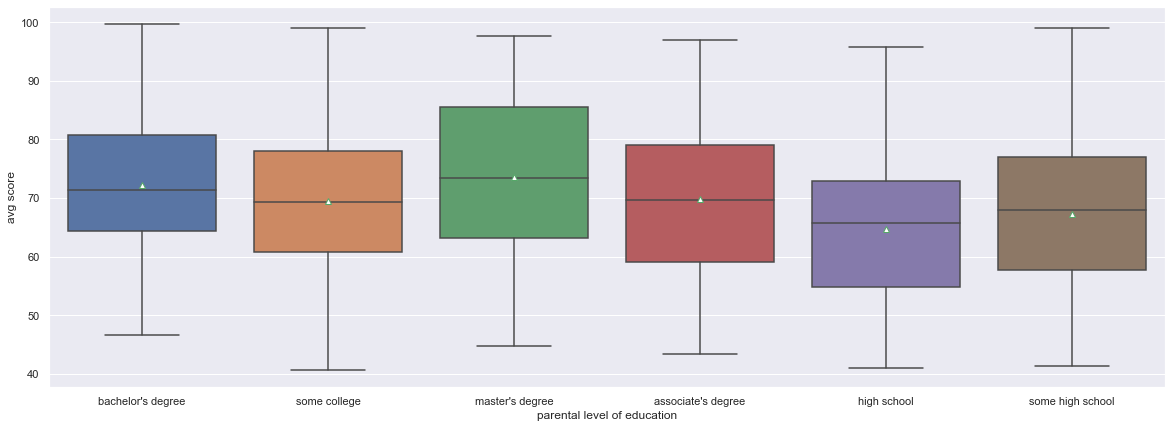

In [35]:
fig, ax = plt.subplots(figsize = (20,7))
sns.boxplot(x=var_of_interest, y="avg score", data=data_trim2, showmeans=True, meanprops={"markerfacecolor":"white"})

In [36]:
stats.levene(data_trim2['avg score'][data_trim2[var_of_interest] == education_level[0]],
      data_trim2['avg score'][data_trim2[var_of_interest] == education_level[1]],
      data_trim2['avg score'][data_trim2[var_of_interest] == education_level[2]],
      data_trim2['avg score'][data_trim2[var_of_interest] == education_level[3]],
      data_trim2['avg score'][data_trim2[var_of_interest] == education_level[4]],
      data_trim2['avg score'][data_trim2[var_of_interest] == education_level[5]])

LeveneResult(statistic=1.2543576266916117, pvalue=0.2816403124228428)

In [37]:
for i in range(len(education_level)):
  print('{var} \n statistic: {result[0]} \n p-value {result[1]}'.format(var=education_level[i], result = stats.shapiro(data_trim2['avg score'][data_trim2[var_of_interest] == education_level[i]])))

bachelor's degree 
 statistic: 0.9853048324584961 
 p-value 0.254457026720047
some college 
 statistic: 0.9905035495758057 
 p-value 0.1734883040189743
master's degree 
 statistic: 0.9737408757209778 
 p-value 0.230475053191185
associate's degree 
 statistic: 0.9812613725662231 
 p-value 0.005550941918045282
high school 
 statistic: 0.9861021041870117 
 p-value 0.06338229030370712
some high school 
 statistic: 0.9833583831787109 
 p-value 0.04189272224903107


shapiro 검정을 만족하지 못하는 요인도 있지만, 중심극한정리에 의해 만족한다고 가정하고 분산분석을 하고자 한다.

In [38]:
stats.f_oneway(data_trim2['avg score'][data_trim2[var_of_interest] == education_level[0]],
      data_trim2['avg score'][data_trim2[var_of_interest] == education_level[1]],
      data_trim2['avg score'][data_trim2[var_of_interest] == education_level[2]],
      data_trim2['avg score'][data_trim2[var_of_interest] == education_level[3]],
      data_trim2['avg score'][data_trim2[var_of_interest] == education_level[4]],
      data_trim2['avg score'][data_trim2[var_of_interest] == education_level[5]])

F_onewayResult(statistic=8.449732116850281, pvalue=7.781958047233906e-08)

In [39]:
from statsmodels.sandbox.stats.multicomp import MultiComparison

comp = MultiComparison(data_trim2['avg score'], data_trim2[var_of_interest])
result = comp.allpairtest(stats.ttest_ind, method='bonf')
print(result[0])

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.00, alphacBonf=0.003
      group1             group2        stat   pval  pval_corr reject
--------------------------------------------------------------------
associate's degree bachelor's degree  -1.701 0.0899       1.0  False
associate's degree       high school   4.029 0.0001     0.001   True
associate's degree   master's degree -2.0014 0.0463     0.695  False
associate's degree      some college  0.1928 0.8472       1.0  False
associate's degree  some high school  1.8797 0.0609    0.9136  False
 bachelor's degree       high school  5.2392    0.0       0.0   True
 bachelor's degree   master's degree -0.6284 0.5306       1.0  False
 bachelor's degree      some college  1.9815 0.0484    0.7257  False
 bachelor's degree  some high school   3.271 0.0012    0.0181   True
       high school   master's degree -4.8737    0.0       0.0   True
       high school      some college   -4.07 0.0001    0.0009   True
       hig

대체로 부모 학력이 대학교 이상일 때 자녀의 점수가 더 높은 것으로 보인다.

In [40]:
var_of_interest_2 = 'test preparation course'
temp = data_trim2.groupby([var_of_interest, var_of_interest_2]).size()/data_trim2.groupby([var_of_interest]).size()
temp

parental level of education  test preparation course
associate's degree           completed                  0.373272
                             none                       0.626728
bachelor's degree            completed                  0.389381
                             none                       0.610619
high school                  completed                  0.295699
                             none                       0.704301
master's degree              completed                  0.338983
                             none                       0.661017
some college                 completed                  0.350467
                             none                       0.649533
some high school             completed                  0.446429
                             none                       0.553571
dtype: float64

'test preparation course' 여부의 영향은 적은 것으로 보인다.

---

### 성별에 따른 차이 분석

In [41]:
var_of_interest = 'gender'
gender = data[var_of_interest].unique()
data[var_of_interest].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [42]:
q3 = data.groupby([var_of_interest]).quantile(0.75)
q1 = data.groupby([var_of_interest]).quantile(0.25)

iqr = q3 - q1
iqr

,math score,reading score,writing score
gender,,,
female,20.0,19.75,18.00
male,20.0,19.00,20.75


In [43]:
data_trim3 = data.copy()

def is_outlier(gender):
  iqr_range = 1.5

  for i in range(len(subject_name)):
    column_name = subject_name[i]
    outlier_detection = lambda x: True if x > q3[column_name][gender] + iqr_range*iqr[column_name][gender] or \
      x < q1[column_name][gender] - iqr_range*iqr[column_name][gender] else False

    outlier_check = data[column_name].apply(outlier_detection)
    data_trim3.drop(data_trim3[outlier_check].index, axis = 0, inplace=True)

  return data_trim3

for i in range(len(gender)):
  is_outlier(gender[i])

data_trim3.shape

(977, 8)

<AxesSubplot:xlabel='gender', ylabel='writing score'>

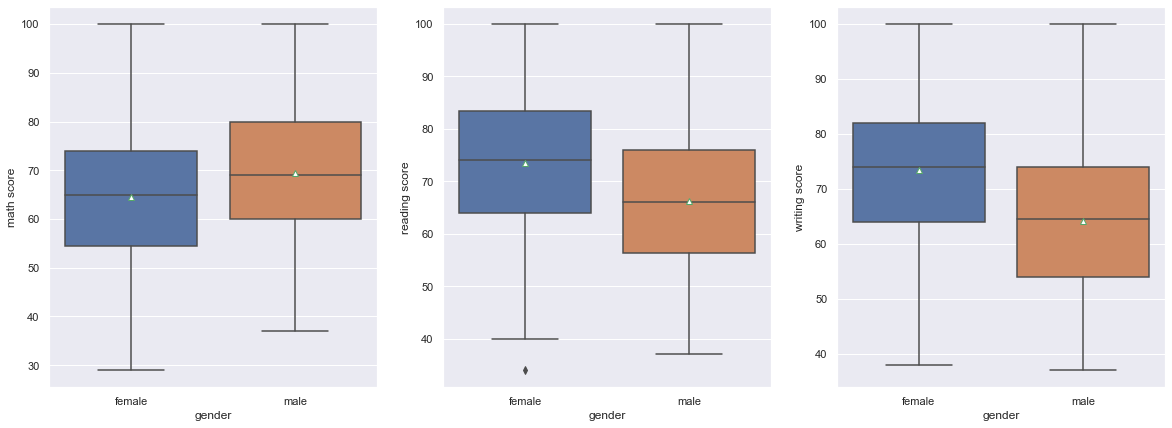

In [44]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=False, figsize = (20,7))
sns.boxplot(x=var_of_interest, y="math score", data=data_trim3, ax=ax[0], showmeans=True, meanprops={"markerfacecolor":"white"})
sns.boxplot(x=var_of_interest, y="reading score", data=data_trim3, ax=ax[1], showmeans=True, meanprops={"markerfacecolor":"white"})
sns.boxplot(x=var_of_interest, y="writing score", data=data_trim3, ax=ax[2], showmeans=True, meanprops={"markerfacecolor":"white"})

In [45]:
data_trim3.groupby(data_trim[var_of_interest]).describe().T

gender                   female        male
math score    count  496.000000  469.000000
              mean    67.743952   66.123667
              std     14.306492   13.974857
              min     29.000000   29.000000
              25%     58.000000   57.000000
              50%     68.000000   65.000000
              75%     78.000000   76.000000
              max    100.000000  100.000000
reading score count  496.000000  469.000000
              mean    70.663306   69.249467
              std     13.618375   13.510981
              min     40.000000   34.000000
              25%     60.750000   59.000000
              50%     71.000000   70.000000
              75%     81.000000   79.000000
              max    100.000000  100.000000
writing score count  496.000000  469.000000
              mean    69.596774   68.200426
              std     14.301611   13.898530
              min     38.000000   37.000000
              25%     58.750000   58.000000
              50%     70.000000   69.000000
              75%     79.250000   78.000000
              max    100.000000  100.000000

In [46]:
data_trim3["all"] = ""
data_trim3.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,all
0,female,group B,bachelor's degree,standard,none,72,72,74,
1,female,group C,some college,standard,completed,69,90,88,
2,female,group B,master's degree,standard,none,90,95,93,
3,male,group A,associate's degree,free/reduced,none,47,57,44,
4,male,group C,some college,standard,none,76,78,75,


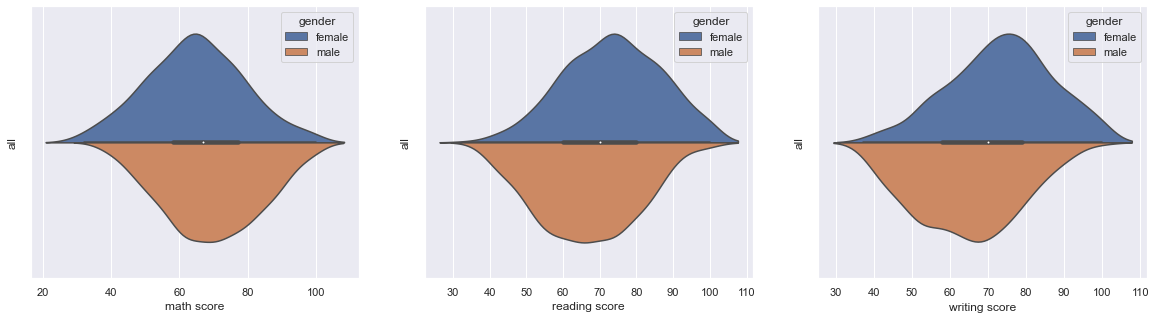

In [47]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
for i in range(len(subject_name)):
  sns.violinplot(x=subject_name[i], y='all', hue='gender', data=data_trim3, split=True, ax = ax[i])

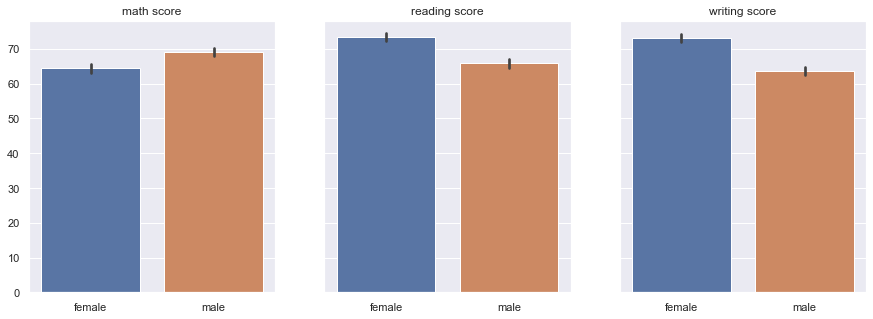

In [48]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5), sharey=True)

for i in range(len(subject_name)):
  sns.barplot(x='gender', y=subject_name[i], data=data_trim, ax=ax[i], ci=95)
  ax[i].set_ylabel('')
  ax[i].set_xlabel('')
  ax[i].set_title(subject_name[i])

In [49]:
for i in range(len(subject_name)):
  print(subject_name[i])

  lresult = stats.levene(data_trim3[subject_name[i]][data_trim3['gender'] == 'female'], data_trim3[subject_name[i]][data_trim3['gender'] == 'male'])
  print('LeveneResult(F) : %.3f \np-value : %.3f' % (lresult)) # 등분산 검정
  
  result = stats.ttest_ind(data_trim3[subject_name[i]][data_trim3['gender'] == 'female'], data_trim3[subject_name[i]][data_trim3['gender'] == 'male'], equal_var=True if lresult[1] > 0.05 else False)
  print('t statistic : %.3f \np-value : %.3f' % (result))
  
  t = result.statistic
  df = len(data_trim3[subject_name[i]][data_trim3['gender'] == 'female']) + len(data_trim3[subject_name[i]][data_trim3['gender'] == 'male']) - 2
  print(f'Cohen\'s D: {abs(t) / np.sqrt(df):.3f}')

  print('-----')

math score
LeveneResult(F) : 0.074 
p-value : 0.785
t statistic : -5.560 
p-value : 0.000
Cohen's D: 0.178
-----
reading score
LeveneResult(F) : 0.006 
p-value : 0.940
t statistic : 8.489 
p-value : 0.000
Cohen's D: 0.272
-----
writing score
LeveneResult(F) : 0.031 
p-value : 0.859
t statistic : 10.805 
p-value : 0.000
Cohen's D: 0.346
-----


수학은 여자보다 남자 집단의 점수가 유의미하게 더 높다.    
읽기와 쓰기는 남자보다 여자 집단의 점수가 유의미하게 더 높다.   
추후 데이터 구조를 바꾸어서 2요인(성별, 과목) 분산분석도 시도해 볼 수 있을 것 같다.